# Исследование стартапов

## Постановка задачи

Наш заказчик - финансовая компания, работающая с венчурными инвестициями, хочет понять закономерности финансирования стартапов и оценить перспективы выхода на рынок с покупкой и развитием компаний. Для этого необходимо провести исследование на исторических данных: исследовать динамику и структуру финансирования стартапов для оценки инвестиционных стратегий.

## План работы

- Загрузить данные и познакомиться с ними: изучить их объем, оценить содержимое, проанализировать типы данных, провести поиск пропущенных значений и дубликатов.
- Провести предобработку данных, убрать дубликаты и пропуски, проверить корректность числовых и временных значений.
- Выделить 3 группы компаний по срокам финансирования и сравнить их по количеству и объёму инвестиций.
- Классифицировать сегменты рынка на массовые, средние и нишевые и учесть это в дальнейшем анализе.
- Проанализировать типичные и аномальные значения объёмов финансирования, исключить выбросы и ограничить период исследования.
- Провести анализ типов финансирования по объёму и популярности.
- Проанализировать динамику раундов и объёмов инвестиций по годам, а также изменения в массовых сегментах рынка.
- Рассчитать долю возврата средств для разных типов финансирования и оценить её устойчивость.
- По результатам проведенного исследовательского анализа написать итоговый вывод и рекомендации.

## Описание данных

- Основной датасет - cb_investments.csv. Он содержит информацию о компаниях и состоявшемся финансировании.
- Дополнительный датасет — cb_returns.csv. Он содержит суммы возвратов по типам финансирования в миллионах долларов по годам.

## Содержание проекта

1. Знакомство с данными: загрузка и предобработка.
2. Инжиринг признаков.
3. Работа с выбросами и анализ.
4. Анализ динамики.
5. Итоговый вывод и рекомендации.

## 1. Знакомство с данными: загрузка и предобработка


In [55]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
# Пытаемся импортировать, и если не получается, устанавливаем
try:
    from phik import phik_matrix
except ImportError:
    !pip install phik
    from phik import phik_matrix

# Убираем предупреждения
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Выгружаем данные в переменные cb_invest и cb_returns
cb_invest = pd.read_csv("https://code.s3.yandex.net/datasets/cb_investments.zip", sep=';', low_memory=False)
cb_returns = pd.read_csv('https://code.s3.yandex.net/datasets/cb_returns.csv')

In [3]:
# Познакомимся с данными датасета cb_investments.csv и вывeдим первые строки на экран
cb_invest.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,Harvard University,http://harvard.edu,|Education|,Education,"9,00,00,000",operating,USA,MA,Boston,Cambridge,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,University of New Brunswick,http://www.unb.ca,NaN,NaN,"20,00,000",operating,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DuPont,http://www.dupont.com,|Business Services|Agriculture|Automotive|Inve...,Business Services,"90,00,000",operating,USA,DE,"Wilmington, Delaware",Wilmington,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,University of Michigan,http://www.umich.edu/,|Education|,Education,"77,00,000",operating,USA,MI,Detroit,Ann Arbor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Case Western Reserve University,http://www.case.edu,|Education|,Education,"5,40,000",operating,USA,OH,Cleveland,Cleveland,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Выводим информацию о датафрейме
cb_invest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   homepage_url          45989 non-null  object 
 2   category_list         45477 non-null  object 
 3    market               45477 non-null  object 
 4    funding_total_usd    49438 non-null  object 
 5   status                48124 non-null  object 
 6   country_code          44165 non-null  object 
 7   state_code            30161 non-null  object 
 8   region                44165 non-null  object 
 9   city                  43322 non-null  object 
 10  funding_rounds        49438 non-null  float64
 11  participants          30473 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

Датасет cb_investments.csv содержит 40 столбцов и 54294 строки, в которых представлена информация о компаниях и состоявшемся финансировании

**После первичного анализа данных можно сделать следующие выводы:**
- Столбцы `market` и `funding_total_usd`,  имеют лишние пробелы в названиях, уберем их. Остальные названия столбцов корректны и имеют единый стиль написания.

**24 столбца имеют тип `float`. Оценим насколько они корректны:**
- `funding_rounds` (общее число раундов финансирования) - общее число раундов не может быть дробным, столбец`participants` (число участников в раундах финансирования) - чило участников также не может быть дробным, `founded_year` (год основания) - год - это целое число. Эти три столбца приведем к целочисленному типу.
- В 21 столбце: `seed` (сумма инвестиций на посевной стадии), `venture` (сумма венчурных инвестиций), `equity_crowdfunding` (сумма, привлечённая через долевой краудфандинг), `undisclosed` (сумма финансирования нераскрытого типа), `convertible_note` (сумма инвестиций через конвертируемые займы), `debt_financing` (сумма долгового финансирования), `angel` (сумма инвестиций от бизнес-ангелов), `grant` (сумма полученных грантов), `private_equity` (сумма инвестиций в виде прямых (частных) вложений), `post_ipo_equity` (сумма финансирования после IPO), `post_ipo_debt` (сумма долгового финансирования после IPO), `secondary_market` (сумма сделок на вторичном рынке), `product_crowdfunding` (сумма, привлечённая через продуктовый краудфандинг), `round_A — round_H` (сумма инвестиций в соответствующем раунде) хранятся данные с различными суммами, поэтому для этих столбцов тип данных корректен.
  
**16 столбцов имеют тип данных `object`. Оценим насколько они корректны:**

- В 9 столбцах: `name` (название компании), `homepage_url` (ссылка на сайт компании), `category_list` (категории, в которых работает компания), `market` (основной рынок или отрасль компании), `status` (текущий статус компании: operating, closed и другое), `country_code` (код страны, например USA), `state_code` (код штата или региона, например CA), `region` (регион), `city` (город, в котором расположена компания) тип данных соответствует информации, хранящихся в них.
- В столбце `funding_total_usd` (общий объём привлечённых инвестиций в долларах США) уберем выделение разрядов и приведем его к числовому типу `float`.\
Столбцы, которые хранят значения даты и времени приведем к нужному типу. А именно: 
-`founded_at` (дата основания компании), `first_funding_at` (дата первого финансирования),`mid_funding_at` (дата среднего по времени раунда финансирования),`last_funding_at` (дата последнего финансирования), `founded_month` (месяц основания), `founded_quarter` (квартал основания) приведем к типу `datetime`.
  
Пропуски содержатся во всех столбцах, далее мы более детально разберем их.

In [5]:
# Познакомимся с данными датасета cb_returns.csv и вывeдим первые строки на экран
cb_returns.head()

,year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
0,2000,16.70,55.40,0.0,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.0,0.20,0.0
1,2001,2.88,23.49,0.0,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.0,0.46,0.0
2,2002,6.59,209.42,0.0,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.0,0.06,0.0
3,2003,7.74,233.86,0.0,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.0,0.08,0.0
4,2004,9.93,555.90,0.0,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.0,0.55,0.0


In [6]:
# Выводим информацию о датафрейме
cb_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  15 non-null     int64  
 1   seed                  15 non-null     float64
 2   venture               15 non-null     float64
 3   equity_crowdfunding   15 non-null     float64
 4   undisclosed           15 non-null     float64
 5   convertible_note      15 non-null     float64
 6   debt_financing        15 non-null     float64
 7   angel                 15 non-null     float64
 8   grant                 15 non-null     float64
 9   private_equity        15 non-null     float64
 10  post_ipo_equity       15 non-null     float64
 11  post_ipo_debt         15 non-null     float64
 12  secondary_market      15 non-null     float64
 13  product_crowdfunding  15 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 1.8 KB


Датасет cb_returns.csv содержит 14 столбцов и 15 строк, который содержит суммы возвратов по типам финансирования в миллионах долларов по годам.

**После первичного анализа данных можно сделать следующие выводы:**
- Названия столбцов корректны и имеют единый стиль написания.
- 13 столбцов имеют тип данных `float`, этот тип данных корректен для этих столбцов, потому что в каждом из них хранится информация о денежных суммах в миллионах долларов.
- 1 столбец (year) имеет тип данных `int`, что тоже корректно - год как целое число.
- Ни в одном столбце нет пропусков.\
Особенность данных:
- Объем данных очень небольшой - всего 15 строк, потому что это агрегированные данные на уровне годов. (1 строка на год, начиная с 2000 по 2014 год).
- В таблицах есть много 0.0 - это реальные нули (отсутствие возвратов), а не пропуски.\
Сделаем столбец `year` индексом всего датасета, чтобы данные автоматически сортировались по годам.

### 1.2. Предобработка данных

In [7]:
# Убираем лишние пробелы в названиях столбцов
cb_invest.columns = cb_invest.columns.str.strip()

In [8]:
# Преобразуем столбцы: funding_rounds, participants, founded_year  в целочисленный тип данных
cb_invest['funding_rounds'] = cb_invest['funding_rounds'].astype('Int16')
cb_invest['participants'] = cb_invest['participants'].astype('Int16')
cb_invest['founded_year'] = cb_invest['founded_year'].astype('Int16')

In [9]:
# Уберем в столбце funding_total_usd выделение разрядов и приведем его к числовому типу.
cb_invest['funding_total_usd'] = pd.to_numeric(cb_invest['funding_total_usd'].str.replace(',', ''), errors='coerce')

In [10]:
# Преобразуем столбцы, которые хранят значения даты и времени к типу datetime
date_columns = ['founded_at', 'first_funding_at', 'mid_funding_at', 'last_funding_at', 'founded_month', 'founded_quarter']
for row in date_columns:
    cb_invest[row] = pd.to_datetime(cb_invest[row], errors = 'coerce')

In [11]:
# Посмотрим наши преобразования типов
cb_invest.dtypes

name                            object
homepage_url                    object
category_list                   object
market                          object
funding_total_usd              float64
status                          object
country_code                    object
state_code                      object
region                          object
city                            object
funding_rounds                   Int16
participants                     Int16
founded_at              datetime64[ns]
founded_month           datetime64[ns]
founded_quarter         datetime64[ns]
founded_year                     Int16
first_funding_at        datetime64[ns]
mid_funding_at          datetime64[ns]
last_funding_at         datetime64[ns]
seed                           float64
venture                        float64
equity_crowdfunding            float64
undisclosed                    float64
convertible_note               float64
debt_financing                 float64
angel                    

Все преобразования типов данных прошли успешно, согласно ожиданиям

In [12]:
# Устанавливаем столбец year индексом датасета cb_returns
cb_returns = cb_returns.set_index('year')

In [13]:
# Выводим датасет для оценки результата
cb_returns.head()

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
year,,,,,,,,,,,,,
2000,16.70,55.40,0.0,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.0,0.20,0.0
2001,2.88,23.49,0.0,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.0,0.46,0.0
2002,6.59,209.42,0.0,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.0,0.06,0.0
2003,7.74,233.86,0.0,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.0,0.08,0.0
2004,9.93,555.90,0.0,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.0,0.55,0.0


In [14]:
# Количество пропусков в абсолютных значениях в датасете cb_invest
cb_invest.isna().sum().sort_values(ascending=False)

state_code              24133
mid_funding_at          24006
participants            23821
founded_quarter         15812
founded_month           15812
founded_at              15741
founded_year            15740
funding_total_usd       13387
city                    10972
region                  10129
country_code            10129
market                   8817
category_list            8817
homepage_url             8305
status                   6170
first_funding_at         4866
last_funding_at          4862
name                     4857
post_ipo_debt            4856
round_F                  4856
round_G                  4856
round_E                  4856
round_D                  4856
round_C                  4856
round_B                  4856
round_A                  4856
product_crowdfunding     4856
secondary_market         4856
venture                  4856
post_ipo_equity          4856
private_equity           4856
grant                    4856
angel                    4856
debt_finan

In [15]:
# Количество пропусков в относительных значениях
cb_invest.isna().mean().sort_values(ascending=False)*100

state_code              44.448742
mid_funding_at          44.214830
participants            43.874093
founded_quarter         29.122923
founded_month           29.122923
founded_at              28.992154
founded_year            28.990312
funding_total_usd       24.656500
city                    20.208494
region                  18.655837
country_code            18.655837
market                  16.239363
category_list           16.239363
homepage_url            15.296350
status                  11.364055
first_funding_at         8.962316
last_funding_at          8.954949
name                     8.945740
post_ipo_debt            8.943898
round_F                  8.943898
round_G                  8.943898
round_E                  8.943898
round_D                  8.943898
round_C                  8.943898
round_B                  8.943898
round_A                  8.943898
product_crowdfunding     8.943898
secondary_market         8.943898
venture                  8.943898
post_ipo_equit

**По количеству пропусков, мы можем сделать следующие выводы:**
- В столбце `state_code` (44.44%) пропуски мы удалять не будем, чтобы не терять массив данных, пропуски заменим на unknown(неизвестно). 
- Пропуски в столбце `mid_funding_at` (44.21%), заполним серединой интервала между первой и последней датой финансирования (first_funding_at, last_funding_at)
- В столбце `participants` (43.9%) пропуски оставим как есть, потому что участники финансирования сложно предсказуемая величина, заполнение может внести значительные искажения, так как процент пропусков очень большой.
- Во временных столбцах: `founded_quarter`(29.12%), `founded_month`(29.12%), `founded_at`(29%), `founded_year`(29%) оставим пропуски без изменений, заполнять мы не будем, чтобы не скажать данные. Сохраним максимум информации для разных видов анализа.
- Пропуски в `funding_total_usd`(24.6%) - требуют специального внимания, так как это ключевая метрика финансирования. Пропуски в этом столбце мы удалим, потому что они не несут какой - либо информации о финансировании.
- Пропуски в 8 столбцах с текстовыми значениями: `city`(20.2%), `region` (18.6%), `country_code` (18.6%), `market`(16.23%), `category_list`(16.23%), `homepage_url` (15.29%), `status` (11.36%), `name` (8.94%) заполним значением unknown(неизвестно). 
- В таблицах: `first_funding_at`(8.96%) и `last_funding_at` (8.95%) пока оставим пропуски как есть, когда нам нужно будет проанализировать сроки финансирования, мы удалим пропуски и сохраним данные в отдельную переменную.
- Мы наблюдаем, что в оставшихся 22 столбцах одинаковое количество пропусков(8.94%) в (`round_A - round_H, post_ipo_debt, product_crowdfunding, secondary_market, venture, post_ipo_equity, grant, angel, debt_financing, convertible_note, undisclosed, equity_crowdfunding, seed, funding_rounds`), перед принятием решения о заполнении, мы проверим действительно ли эти значения являются пропусками (NaN), или же данные заполнены и имеют значение 0.

In [16]:
# Посчитаем количество строк до начала преобразований и сохраним в переменную
total = cb_invest.shape[0]

In [17]:
# Удаляем пропуски в столбце funding_total_usd
cb = cb_invest.dropna(subset=['funding_total_usd'])

In [18]:
# Заполним пропуски в текстовых столбцах на значение unknown
columns_object = ['state_code', 'city', 'region', 'country_code', 'market', 'category_list', 'homepage_url', 'status', 'name']
for row in columns_object:
    cb[row] = cb[row].fillna('unknown')

In [19]:
# Вычислим середину интервала между first_funding_at и last_funding_at и заполним пропуски в mid_funding_at
interval = cb['first_funding_at'] + (cb['last_funding_at'] - cb['first_funding_at']) / 2
cb['mid_funding_at'] = cb['mid_funding_at'].fillna(interval)

In [20]:
# Оценим одинаковые пропуски в 22 столбцах
columns_22 = ['round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H', 'post_ipo_debt', 'product_crowdfunding', 'secondary_market', 'venture', 'post_ipo_equity', 'grant', 'angel', 'debt_financing', 'convertible_note', 'undisclosed', 'equity_crowdfunding', 'seed', 'funding_rounds']
for row in columns_22:
    count = cb[row].isna().sum()
    zero_count = (cb[row] == 0).sum()
    print (count, zero_count)

0 31904
0 35460
0 38070
0 39619
0 40391
0 40735
0 40873
0 40903
0 40832
0 40694
0 40888
0 17630
0 40591
0 39765
0 37778
0 36682
0 40350
0 39955
0 40385
0 27067
0 0


Мы выявили, что в данных столбцах это не системные пропуски, требующие заполнения. Это корректные нулевые значения, отражающие отсутствие инвестиций данного типа.

In [21]:
# Посмотрим на количество пропусков после заполнений
cb.isna().sum().sort_values(ascending=False)

participants            13576
founded_quarter          8772
founded_month            8772
founded_at               8707
founded_year             8706
first_funding_at            2
mid_funding_at              1
grant                       0
private_equity              0
post_ipo_equity             0
post_ipo_debt               0
name                        0
debt_financing              0
secondary_market            0
product_crowdfunding        0
round_A                     0
round_B                     0
round_C                     0
round_D                     0
round_E                     0
round_F                     0
round_G                     0
angel                       0
venture                     0
convertible_note            0
undisclosed                 0
equity_crowdfunding         0
homepage_url                0
seed                        0
last_funding_at             0
funding_rounds              0
city                        0
region                      0
state_code

In [22]:
# Удалим 1 пропуск в mid_funding_at и 2 пропуска в first_funding_at
cb = cb.dropna(subset=['mid_funding_at', 'first_funding_at'])

In [23]:
# Посмотрим на количество пропусков 
cb.isna().sum().sort_values(ascending=False)

participants            13575
founded_quarter          8772
founded_month            8772
founded_at               8707
founded_year             8706
convertible_note            0
angel                       0
grant                       0
private_equity              0
post_ipo_equity             0
post_ipo_debt               0
name                        0
secondary_market            0
product_crowdfunding        0
round_A                     0
round_B                     0
round_C                     0
round_D                     0
round_E                     0
round_F                     0
round_G                     0
debt_financing              0
venture                     0
undisclosed                 0
region                      0
category_list               0
market                      0
funding_total_usd           0
status                      0
country_code                0
state_code                  0
city                        0
equity_crowdfunding         0
funding_ro

В процессе предобработки данных были заполнены пропуски в текстовых столбцах значением unknown. Удаление строк с отсутствующей информацией в столбце `funding_total_usd` также привело к удалению связанных с ними записей в 22 финансовых столбцах.\
Были удалены единичные оставшиеся пропуски в столбцах `mid_funding_at` и `first_funding_at`.\
Далее мы переходим к поиску явных  и неявных дубликатов.

In [24]:
# Приведем все столбцы с текстовых значением в нижний регистр, а код штата и страны в верхний регистр
text_columns = cb.select_dtypes(include=['object']).columns
cb[text_columns] = cb[text_columns].apply(lambda x: x.str.strip().str.lower())
cb[['country_code', 'state_code']] = cb[['country_code', 'state_code']].apply(lambda x: x.str.upper())

In [25]:
# Проверяем полные дубликаты в датафрейме cb
cb.duplicated().sum()

0

In [26]:
# Проверяем неявные дубликаты в датафрейме cb по названию, ссылке на сайт компании и категории, в которых работает компания 
cb.duplicated(subset=['name', 'homepage_url', 'category_list']).sum()

0

In [27]:
# Считаем количество строк после всех преобразований
cb.shape[0]

40905

In [28]:
# Cчитаем количество всех удаленных строк в абсолютном значении
total - cb.shape[0]

13389

In [29]:
# Считаем количество удаленных строк в относительном значении
round((total - cb.shape[0]) / total * 100, 2)

24.66

**В процессе предобработки данных были выполнены следующие операции:**
- Мы убрали лишние пробелы в названиях столбцов.
- Преобразовали столбцы: `funding_rounds, participants, founded_year`  в целочисленный тип данных.
- Преобразовали столбцы, которые хранят значения даты и времени к типу `datetime`.
- Установили столбец `year` индексом датасета `cb_returns`.
- Посчитали пропуски в абсолютном и относительном значении и заполнили их, согласно нашим выводам. А именно:
  - Пропуски в столбце `funding_total_usd` удалили и сохранили новый датафрейм в переменную `cb`
  - Пропуски в текстовых столбцах заполнили значением `unknown`
  - Вычислили середину интервала между `first_funding_at и last_funding_at` и заполнили пропуски в `mid_funding_at`
- Привели все столбцы с текстовыми значениями в нижний регистр, а код штата и страны в верхний регистр.
- Явных и неявных дубликатов обнаружено не было.
- После всех предобработок осталось 40905 уникальных записей
- Относительная доля удаленных записей: 24.66% от общего объема данных.\
Набор данных полностью прошел предобработку, можно приступать к следующему этапу анализа.

## 2. Инжиниринг признаков

### 2.1. Группы по срокам финансирования

Разделим все компании на три группы:

* Единичное финансирование — был всего один раунд финансирования.

* Срок финансирования до года — между первым и последним раундом финансирования прошло не более года.

* Срок финансирования более года.

Визуализируем соотношение этих групп, создав два графика:

* По количеству компаний: какой процент от общего числа компаний относится к каждой из трёх групп.
* По объёму инвестиций: какую долю от общего объёма привлечённых средств получила каждая группа.

In [30]:
# Разделим все компании на три категории и добавим новый столбец в датафрейм cb
def group (row):
    if row['funding_rounds'] == 1:
        return 'Единичное финансирование'
    else:
        days_diff = (row['last_funding_at'] - row['first_funding_at']).days
        if days_diff <= 365:
            return 'Срок финансирования до года'
        else:
            return 'Срок финансирования больше года'
cb['funding_category'] = cb.apply(group, axis=1)

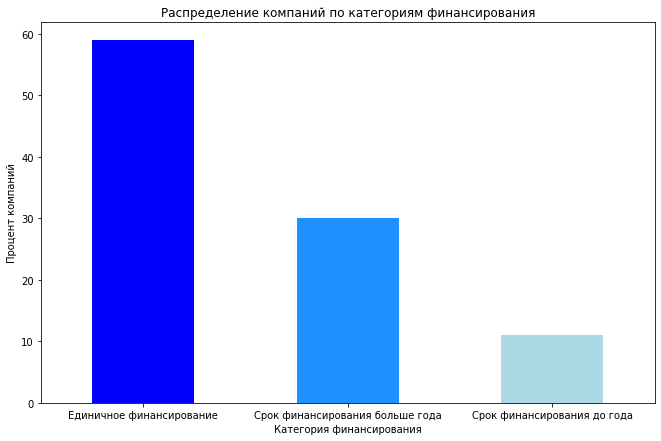

In [31]:
# Посчитаем какой процент от общего числа компаний относится к каждой из трёх групп и построим столбчатую диаграмму
company_counts = cb['funding_category'].value_counts()
total_companies = len(cb)
perc = (company_counts / total_companies) * 100
color_palette = ['blue', 'dodgerblue', 'lightblue']
perc.plot(kind='bar',
                title='Распределение компаний по категориям финансирования',
                legend=False,
                ylabel='Процент компаний',
                xlabel='Категория финансирования',
                rot=0,
                color=color_palette,
                figsize=(11, 7))
plt.show()

Мы наблюдаем, что большинство компаний относятся к категории "Единичное финансирование", что говорит о большом количестве стартапов, которые привлекли инвестиции лишь один раз.

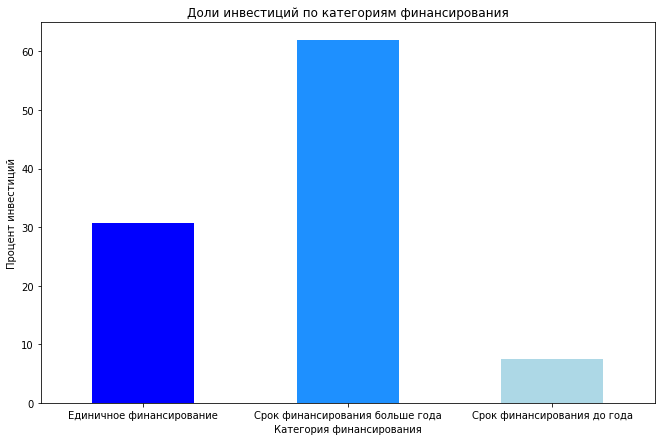

In [56]:
# Посчитаем какую долю от общего объёма привлечённых средств получила каждая группа и построим столбчатую диаграмму
invest = cb.groupby('funding_category')['funding_total_usd'].sum()
total_investment = invest.sum()
invest_perc = (invest / total_investment) * 100
color_palette = ['blue', 'dodgerblue', 'lightblue']
invest_perc.plot(kind='bar',
                 title='Доли инвестиций по категориям финансирования',
                 legend=False,
                 ylabel='Процент инвестиций',
                 xlabel='Категория финансирования',
                 rot=0,
                 color=color_palette,
                 figsize=(11, 7))
plt.show()

Основная доля инвестиций приходится на компании со сроков финансирования больше года, а компании со сроком финансирования до года получают наименьшую долю средств.
- Наблюдается неравномерное распределение между количеством компаний и объемом инвестиций. Большинство проектов ограничиваются единичным финансированием, а основной капитал привлекают компании с длительной историей финансирования.


### 2.2 Выделение средних и нишевых сегментов рынка

Рассчитаем, как часто в датасете встречается каждый из сегментов
- сегменты, к которым относится более 120 компаний - отнесем к массовым
- сегменты, в которые входит от 35 до 120 включительно - отнесите к средним
- сегменты до 35 компаний - к нишевым

Построим график распределения количества компаний в сегментах и отобразим на нём разделение на нишевые и средние сегменты.

In [33]:
# Посчитаем, как часто в датасете встречается каждый из сегментов
cb_market = cb[cb['market'] != 'unknown']
market_counts = cb_market['market'].value_counts()
mass_market = (market_counts > 120).sum()
mid_market = ((market_counts >= 35) & (market_counts <= 120)).sum()
niche_market = (market_counts < 35).sum()
print(f"Массовых сегментов: {mass_market}")
print(f"Средних сегментов: {mid_market}")
print(f"Нишевых сегментов: {niche_market}")

Массовых сегментов: 48
Средних сегментов: 57
Нишевых сегментов: 289


In [34]:
# Посчитаем количество компаний в каждом сегменте
cb_market = cb[cb['market'] != 'unknown']
cb_market['market_counts'] = cb_market.groupby('market')['market'].transform('count')
cb_market['market_category'] = pd.cut(cb_market['market_counts'],
                              bins=[0, 35, 120, float('inf')],
                              labels=['niche', 'mid', 'mass'],
                              right=True)
cb_market['market_category'].value_counts()

mass     33733
mid       3839
niche      830
Name: market_category, dtype: int64

- Мы наблюдаем, что количество нишевых сегментов(до 35 компаний) больше остальных -289. При этом, общее количество компаний в нисшем сигменте - 830.
- Массовых сегментов, где более 120 компаний - 48. При этом общее количество компаний в массовых сегментах(33733) сильно отличается от количества компаний в других сегментах.

Построим график распределения количества компаний в сегментах и отобразим на нём разделение на нишевые и средние сегменты.

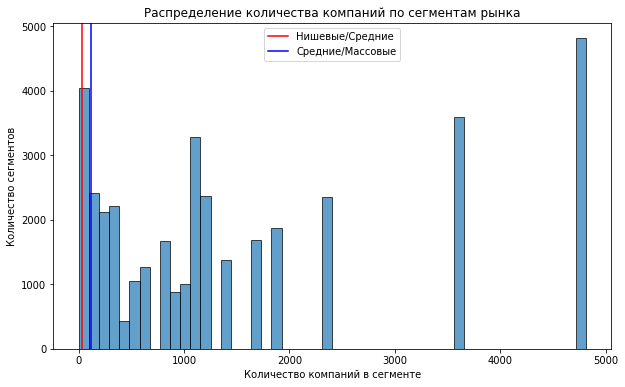

In [35]:
cb_market = cb[cb['market'] != 'unknown']
cb_market['market_counts'] = cb_market.groupby('market')['market'].transform('count')
cb_market['market_category'] = pd.cut(cb_market['market_counts'],
                              bins=[0, 35, 120, float('inf')],
                              labels=['niche', 'mid', 'mass'],
                              right=True)
plt.figure(figsize=(10, 6))
plt.hist(cb_market['market_counts'], bins=50, alpha=0.7, edgecolor='black')
plt.axvline(x=35, color='red', label='Нишевые/Средние')
plt.axvline(x=120, color='blue', label='Средние/Массовые')
plt.xlabel('Количество компаний в сегменте')
plt.ylabel('Количество сегментов')
plt.title('Распределение количества компаний по сегментам рынка')
plt.legend()
plt.show()

На графике мы видим сильные выбросы - несколько массовых сегментов с аномально большим количеством компаний искажают общую картину распределения, далее более подробно поработаем с выбросами.

Оставим  в столбце `market` только массовые сегменты. Для остальных сегментов заменим значения на заглушки — `niche` для нишевых и `mid` для средних. Дальнейшие исследования выполним  с учётом этой замены.

In [36]:
# Заменим значения на заглушки — niche для нишевых и mid для средних
replace_dict = {}
for market, count in market_counts.items():
    if count > 120:
        replace_dict[market] = market
    elif count >= 35:
        replace_dict[market] = 'mid'
    else:
        replace_dict[market] = 'niche'
cb_market['market'] = cb_market['market'].replace(replace_dict)
cb_market['market']   

0        education
2              mid
3        education
4        education
6        education
           ...    
49423     software
49424     software
49427        games
49434        niche
49437     startups
Name: market, Length: 38402, dtype: object

Заглушки для нишевых и средних сегментов заменены успешно.

##  3. Работа с выбросами и анализ

### 3.1. Анализируем и помечаем выбросы в каждом из сегментов

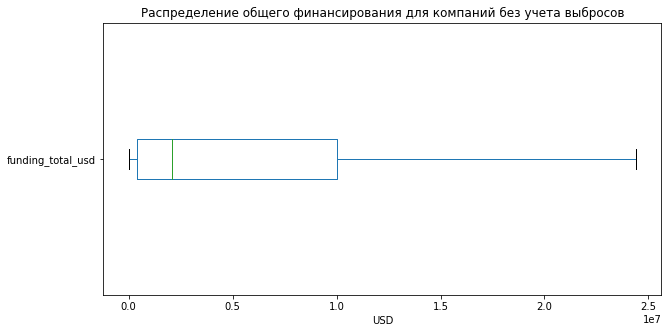

In [37]:
# Построим ящик с усами, скрывая выбросы
boxplot = cb_market.boxplot(column='funding_total_usd',
                     vert=False,
                     figsize=(10, 5), 
                     showfliers=False,
                     grid=False)
boxplot.set_title('Распределение общего финансирования для компаний без учета выбросов')
boxplot.set_xlabel('USD')
plt.show()

Мы наблюдаем правоассиметричное расспределение данных. Основное распределение данных (Q1 и Q3) находятся на 0.04 и 1.0 (1e7) долларов США.\
Рассчитаем квартили для точного определения типичного диапазона общего финансирования для одной компании.

In [57]:
Q1 = cb_market['funding_total_usd'].quantile(0.25)
Q3 = cb_market['funding_total_usd'].quantile(0.75)
IQR = Q3 - Q1
print(f'Типичный интервал финансирования: от {Q1:.2f} до {Q3:.2f} USD (размерность 10 млн $)')
Q1_s = Q1 / 10000000
Q3_s = Q3 / 10000000
print(f'Q1 на шкале графика {Q1_s}')
print(f'Q3 на шкале графика {Q3_s}')

Типичный интервал финансирования: от 400000.00 до 10000000.00 USD (размерность 10 млн $)
Q1 на шкале графика 0.04
Q3 на шкале графика 1.0


In [39]:
# Вначале определим выбросы
def is_funding_anomaly(series, value):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    return value > upper_bound

# Cоздадим обобщенные группы сегментов
def create_segment_group(market):
    if market == 'niche':
        return 'niche'
    elif market == 'mid':
        return 'mid'
    else:
        return market
cb_market['segment_group'] = cb_market['market'].apply(create_segment_group)
# Создадим булевый столбец funding_anomaly для каждой компании
cb_market['funding_anomaly'] = cb_market.groupby('segment_group')['funding_total_usd'].transform(
    lambda x: x > (x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25))))
# Посчитаем долю компаний выбросов по каждому сегменту
anomaly_market = cb_market.groupby('market')['funding_anomaly'].mean().sort_values(ascending=False)
print(f'Топ-10 сегментов с наибольшей долей аномального финансирования {anomaly_market.head(10)}')

Топ-10 сегментов с наибольшей долей аномального финансирования market
real estate        0.172043
entertainment      0.166667
consulting         0.166189
search             0.164948
cloud computing    0.164474
saas               0.161765
photography        0.161765
technology         0.159664
video              0.159574
niche              0.159036
Name: funding_anomaly, dtype: float64


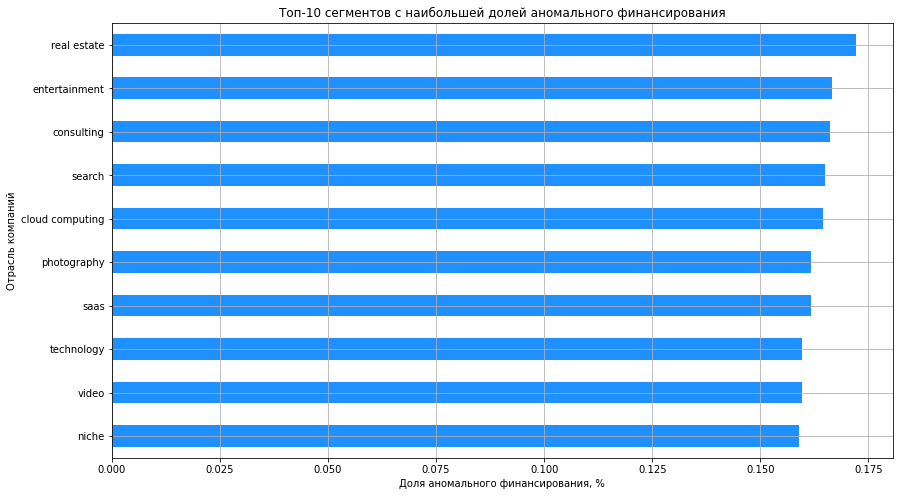

In [40]:
# Построим столбчату диаграмму для визуальной оценки
plt.figure(figsize=(14, 8))
anomaly_market.head(10).sort_values(ascending=True).plot(
               kind='barh', 
               rot=0, 
               legend=False,
               title=f'Топ-10 сегментов с наибольшей долей аномального финансирования',
               color='dodgerblue'
)
plt.xlabel('Доля аномального финансирования, %')
plt.ylabel('Отрасль компаний')
plt.grid()
plt.show()

- На основе анализа мы выявили, что лидером аномально-высокого финансирования является сегмент - real estate(17.2%). 
- В целом, мы  наблюдаем, что все сегменты из топа имеют схожий уровень аномалий (15.9-17.2%). 
- Нишевые сегменты тоже демонстрируют высокую долю аномалий (15.9%)

### 3.2 Определяем границы рассматриваемого периода, отбрасываем аномалии

- проверим по датасету, что нам предоставили полные данные за 2014 год
- исключите из датасета компании, которые получили аномальное финансирование.
- оставим компании, которые получали финансирование в годы, когда было зафиксировано 50 или более раундов финансирования.

In [41]:
# Посмотрим на полноту данных за 2014 год
cb_2014 = cb_market[cb_market['founded_at'].dt.year == 2014]
montly_counts2014 = cb_2014['founded_at'].dt.month.value_counts().sort_index()
print('Количество компаний, основанные в каждом месяце в 2014 году')
print(montly_counts2014)

# Сравним и посмотрим на полноту данных за 2013 год
cb_2013 = cb_market[cb_market['founded_at'].dt.year == 2013]
montly_counts2013 = cb_2013['founded_at'].dt.month.value_counts().sort_index()
print('Количество компаний, основанные в каждом месяце в 2013 году')
print(montly_counts2013)

Количество компаний, основанные в каждом месяце в 2014 году
1     377
2      99
3      97
4      90
5      66
6      62
7      40
8      25
9      23
10     13
11      3
12      2
Name: founded_at, dtype: int64
Количество компаний, основанные в каждом месяце в 2013 году
1     1296
2      174
3      191
4      183
5      183
6      178
7      165
8      126
9      134
10     141
11     126
12      91
Name: founded_at, dtype: int64


Данные за 2014 год являются неполными, особенно во второй половине года. При сравнении с 2013 годом, видно резкое снижение количества основанных компаний. Сильно выделяются ноябрь и декабрь 2014 года.

In [42]:
# Исключим компании с аномальным финансированием
cb_clean = cb_market[~cb_market['funding_anomaly']].copy()

In [62]:
# Отфильтруем компании, которые получили финансирование в годы, когда было зафиксировано 50 или более раундов финансирования
cb_clean['funding_year'] = cb_clean['mid_funding_at'].dt.year
total_rounds = cb_clean.groupby('funding_year')['funding_rounds'].count()
fin_rounds = total_rounds[total_rounds >= 50]
final_companies = cb_clean[cb_clean['funding_year'].isin(fin_rounds.index)]
print(f"Было компаний: {len(cb_clean)}")
print(f"Осталось компаний: {len(final_companies)}")
print('Годы с 50+ раундами финансирования')
print(fin_rounds)

Было компаний: 33531
Осталось компаний: 33396
Годы с 50+ раундами финансирования
funding_year
2000      61
2003      60
2004      89
2005     682
2006    1145
2007    1581
2008    1952
2009    2487
2010    3326
2011    4137
2012    5189
2013    7339
2014    5348
Name: funding_rounds, dtype: int64


- Фильтрация выполнена успешно. Оставлены данные о 33396 компаниях, которые получали финансирование, когда было зафиксировано 50 или более раундов финансирования(2000, 2003-2014 годы).
- Наибольшее количество раундов финансирования было в 2013 году - 7339.

Примечание о 2014 годе: в задании 3.2 мы обнаружили, что данные за 2014 год являются неполными (резкое снижение количества компаний во второй половине года). Однако задания 4.1–4.3, а также итоговые выводы в разделе 5 требуют анализа динамики, включая 2014 год. Поэтому для корректного выполнения этих заданий мы оставляем 2014 год в выборке, но с пометкой о неполноте данных при интерпретации результатов.

### 3.3. Анализ типов финансирования по объёму и популярности

- построим график, который покажет, какие типы финансирования в сумме привлекли больше всего денег
- построим график, который покажет популярность разных типов финансирования
Сравним графики и выделим часто используемые типы финансирования, которые при этом характеризуются небольшими объёмами, и наоборот — те, что встречаются редко, но при этом характеризуются значительным объёмом предоставленных сумм.

In [44]:
# Выведем какие типы финансирования в сумме привлекли больше всего денег
columns = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding']
total_funding = cb_clean[columns].sum()
total_funding.sort_values(ascending=True)

secondary_market        4.458580e+07
product_crowdfunding    1.823469e+08
equity_crowdfunding     2.265826e+08
post_ipo_debt           2.867183e+08
convertible_note        5.504268e+08
grant                   1.913027e+09
post_ipo_equity         1.942102e+09
undisclosed             2.072777e+09
angel                   2.441532e+09
private_equity          4.795806e+09
debt_financing          8.010953e+09
seed                    9.124854e+09
venture                 1.283343e+11
dtype: float64

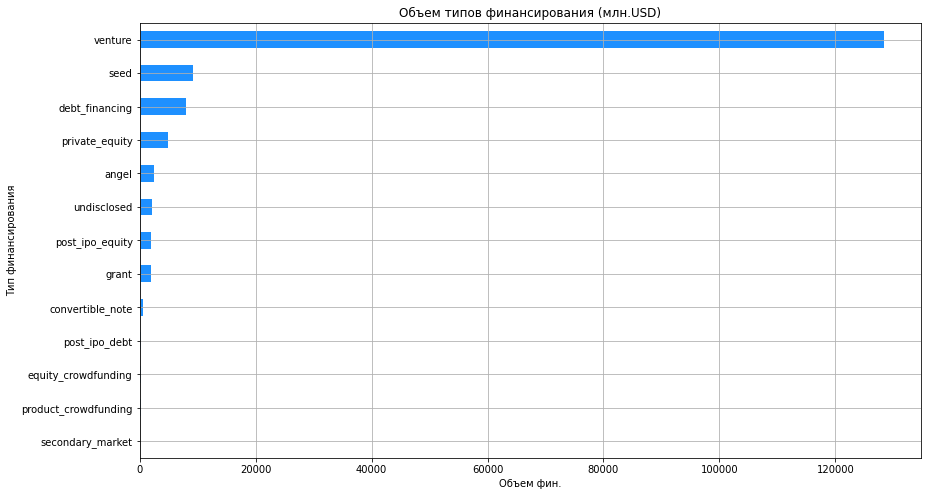

In [45]:
# Построим столбчату диаграмму для визуальной оценки
plt.figure(figsize=(14, 8))
total_fundings_m = total_funding / 1000000
total_fundings_m.sort_values(ascending=True).plot(
               kind='barh', 
               rot=0, 
               legend=False,
               title=f'Объем типов финансирования (млн.USD)',
               color='dodgerblue'
)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Объем фин.')
plt.ylabel('Тип финансирования')
plt.grid()
plt.show()

Мы наблюдаем, что преобладает венчурное финансирование (venture), существенного опережая остальные типы по объему финансов.

In [46]:
# Выведим популярность типов финансирования
company_count = (cb_clean[columns] > 0).sum()
company_count.sort_values(ascending=True)

secondary_market            6
post_ipo_debt              27
post_ipo_equity           163
product_crowdfunding      195
equity_crowdfunding       471
convertible_note          501
private_equity            618
undisclosed               746
grant                     918
angel                    2866
debt_financing           3098
seed                    12371
venture                 18173
dtype: int64

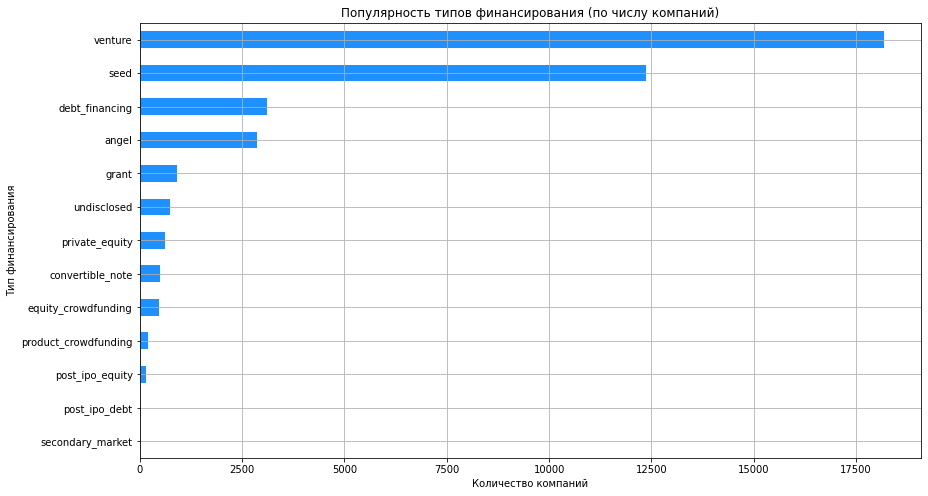

In [47]:
# Построим столбчату диаграмму для визуальной оценки
plt.figure(figsize=(14, 8))
company_count.sort_values(ascending=True).plot(
               kind='barh', 
               rot=0, 
               legend=False,
               title=f'Популярность типов финансирования (по числу компаний)',
               color='dodgerblue'
)
plt.xlabel('Количество компаний')
plt.ylabel('Тип финансирования')
plt.grid()
plt.show()

Наиболее популярны (по количеству компаний) venture и seed финансирование. Также, заметное число компаний используют debt_financing и angel. Остальные типы финансирования используются реже.

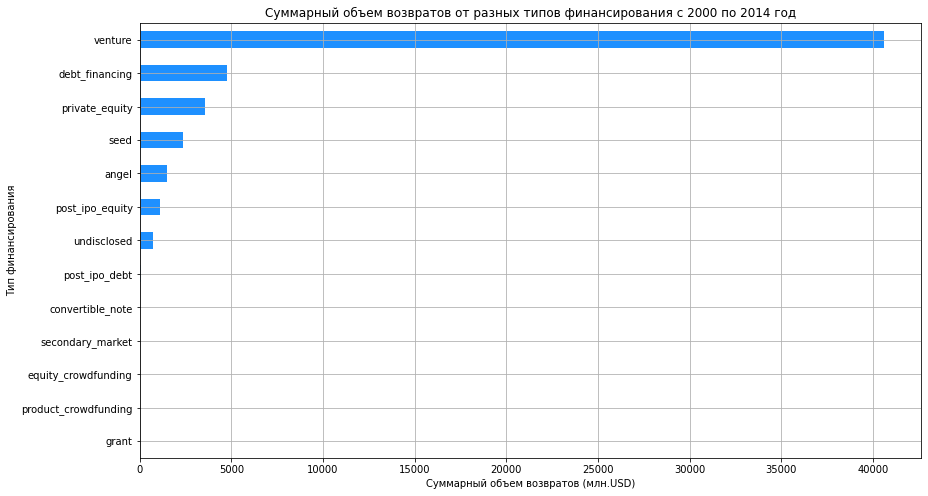

In [48]:
# Построим график суммарных объёмов возвратов от разных типов финансирования за весь период на основе cb_returns
total_returns = cb_returns.sum()
plt.figure(figsize=(14, 8))
total_returns.sort_values(ascending=True).plot(
               kind='barh', 
               rot=0, 
               legend=False,
               title=f'Суммарный объем возвратов от разных типов финансирования с 2000 по 2014 год',
               color='dodgerblue'
)
plt.xlabel('Суммарный объем возвратов (млн.USD)')
plt.ylabel('Тип финансирования')
plt.grid()
plt.show()

- `Venture` финансирование является не только самым популярным (как видно из предыдущих графиков), но и приносится наибольший объем возвратом. Венчурное финансирование доказало, что может генерировать ограмные деньги для инвесторов, несмотря на высокие риски.
- `Debt_financing` и `privat_equity` показывают значительные объемы возвратов, при этом `privat_equity` был менее популярен по числу компаний, но показывает высокую отдачу.
- `Grant` популярен, но почти нулевые возвраты (гранты обычно безвозвратны).

## 4. Анализ динамики

### 4.1 Динамика предоставления финансирования по годам

- рассчитайте для каждой компании средний объём одного раунда финансирования.

На основе получившейся таблицы постройте графики, отражающие:
* динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования;
* динамику общего количества раундов за каждый год, то есть насколько активно происходили инвестиции на рынке (чем больше раундов, тем выше активность).

На основе полученных данных ответим на вопросы:
- в каком году типичный размер средств, собранных в рамках одного раунда, был максимальным?
- какая тенденция наблюдалась в 2014 году по количеству раундов и средств, выделяемых в рамках каждого раунда?

In [63]:
# Расчитаем средний объем одного раунда финансирования для каждой компании
cb_clean['avg_round_funding'] = cb_clean['funding_total_usd'] / cb_clean['funding_rounds']

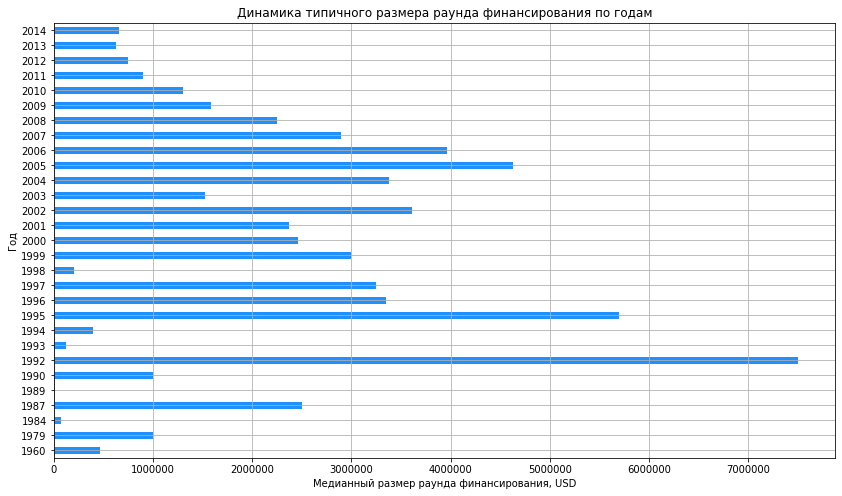

In [64]:
# Посчитаем динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования
cb_clean['year'] = cb_clean['mid_funding_at'].dt.year
median_1 = cb_clean.groupby('year').agg({'avg_round_funding': 'median'}).reset_index()
# Построим столбчатую диаграмму
median_1.plot(
               kind='barh', 
               x='year',
               y='avg_round_funding',
               rot=0, 
               legend=False,
               title=f'Динамика типичного размера раунда финансирования по годам',
               color='dodgerblue',
               figsize=(14, 8)
)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Медианный размер раунда финансирования, USD')
plt.ylabel('Год')
plt.grid()
plt.show()

- Максимальный типичный размер средств, которые стартапы получали в рамках одного раунда финансирования был в 1992 году - столбец для этого года значительно длинее всех остальных( приблизительно 75 млн долларов)
- в 2014 году типичный размер средств для одного раунда составлял около 5 000 000 USD (5 млн долларов). По сравнению с предыдущими годами размер раунда был стабильным, но не рекордным. Следует учитывать, что данные за 2014 год неполные (резкое снижение числа компаний во второй половине года), поэтому результаты по нему носят ориентировочный характер.
- После пикового значения в 1992 году наблюдается снижение типичных размеров раундов, с некоторыми колебаниями в последующие годы.

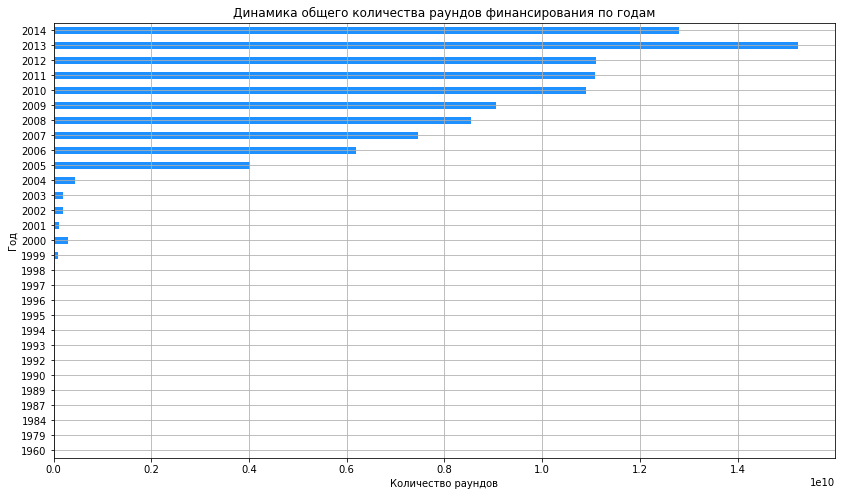

In [65]:
# Посчитаем динамику общего количества раундов за каждый год
sum_rounds = cb_clean.groupby('year').agg({'avg_round_funding': 'sum'}).reset_index()
# Построим столбчатую диаграмму
sum_rounds.plot(
               kind='barh', 
               x='year',
               y='avg_round_funding',
               rot=0, 
               legend=False,
               title=f'Динамика общего количества раундов финансирования по годам',
               color='dodgerblue',
               figsize=(14, 8)
)
plt.xlabel('Количество раундов')
plt.ylabel('Год')
plt.grid()
plt.show()

- Мы наблюдаем стремительный рост инвестиционной активности с 2005 года.
- 2014 год (данные за этот год неполные) показывает близкую к максимальной активность по количеству раундов, однако этот результат следует интерпретировать с осторожностью из-за резкого снижения числа компаний во второй половине года.
- Резкий рост количества раундов может говорить о развитии венчурного рынка.
- Интересное наблюдение: максимальный типичный размер средств, которые стартапы получали в рамках одного раунда финансирования, был в 1992 году. Это могло произойти потому, что было мало сделок, но несколько из них были крупными.
- Несмотря на неполноту данных за 2014 год, мы видим, что к этому периоду рынок достиг определенной зрелости: инвесторы готовы заключать много сделок, и каждая из них в среднем крупная. Однако этот вывод требует уточнения при появлении полных данных.

### 4.2 Динамика размера общего финансирования по массовым сегментам рынка для растущих в 2014 году сегментов

- сделаем сводную таблицу, в которой указывается суммарный размер общего финансирования по годам и сегментам рынка
- отберем из таблицы только те сегменты, которые показывали рост размера суммарного финансирования в 2014 году по сравнению с 2013.
- на графике отразим, как менялся суммарный размер общего финансирования в каждом из отобранных сегментов по годам, рассматривайте только массовые сегменты.

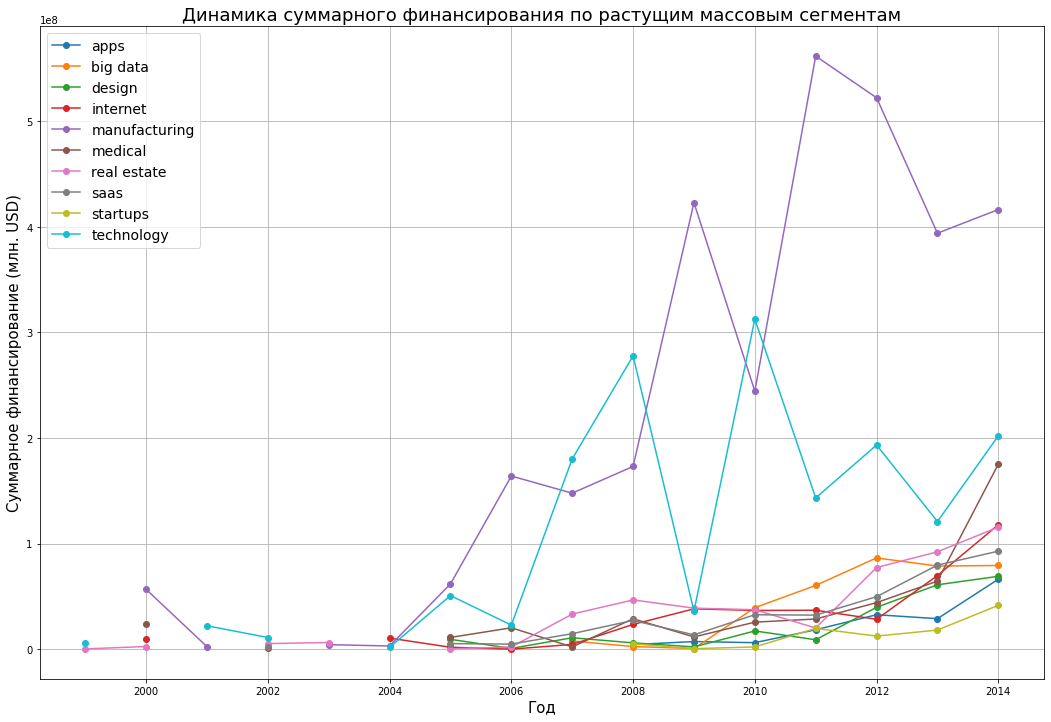

In [52]:
# Исключим сегменты mid и niche
mass_segments = cb_clean[~cb_clean['market'].str.contains('mid|niche')]

# Создаем сводную таблицу, столбец year с годами мы выделили ранее
pivot_mass = mass_segments.pivot_table(values='funding_total_usd', index='year', columns='market', aggfunc='sum')

# Отбираем сегменты, которые показывали рост размера суммарного финансирования в 2014 году по сравнению с 2013
rast_segments = []
for segment in pivot_mass.columns:
    if 2013 in pivot_mass.index and 2014 in pivot_mass.index:
        if pivot_mass.loc[2014, segment] > pivot_mass.loc[2013, segment]:
            rast_segments.append(segment)

# Строим график динамики для всех отобранных сегментов по всем годам
plt.figure(figsize=(18, 12))
for segment in rast_segments:
    plt.plot(pivot_mass.index, pivot_mass[segment], marker='o', label=segment)
    
plt.title('Динамика суммарного финансирования по растущим массовым сегментам', fontsize=18)
plt.xlabel('Год', fontsize=15)
plt.ylabel('Суммарное финансирование (млн. USD)', fontsize=15)
plt.legend(loc='upper left', fontsize=14)
plt.grid(True)
plt.show()

**По анализу динамики размера общего финансирования по массовым сегментам рынка для растущих в 2014 году сегментов мы можем сделать следующие выводы:**
- Особенно на графике выделяются два сегмента: `technology`(технологии) показывает пик финансирования в 2008 и в 2010 годах, сейчас мы наблюдаем также увеличение активности финансирования, сегмент `manufacturing`(производство - промышленные технологии) показывает пик высокой активности в 2009 и в 2011 годах, сейчас мы видим тоже предрасположенность к увеличению финансирования.
- Сегменты: `big_data` (большие данные), `design` (дизайн - дизайн-сервисы), `internet` (интернет - интернет-сервисы, платформы), `real estate` (недвижимость), `saas` (Software as a Service - программное обеспечние как услуга), `startups` (все венчурные проекты на ранних стадиях), `apps`(приложения - мобильные, веб-приложения), особенно `medical`(медицина) показывают устойчивое увеличение финансирования.

### 4.3 Годовая динамика доли возвращённых средств по типам финансирования

- для каждого года и каждого вида финансирования рассчитать нормированные значения возврата средств: то есть какую долю возвращённые средства составляют от предоставленных. При этом аномальные значения заменим на пропуски

In [53]:
# Суммируем объемы финансирования в датасете cn_clean по годам и типам (используем существующий столбец year)
types = ['venture', 'debt_financing', 'private_equity', 'seed', 'angel']
cb_invest_year = cb_clean.groupby('year')[types].sum()

# Сбросим индекс в cb_returns для последующего объединения 
cb_return = cb_returns.reset_index()

# Также сгруппируем данные по году и по нужным нам столбцам
cb_return_year = cb_return.groupby('year')[types].sum()

# Объединим две таблицы
merged_data = cb_invest_year.merge(cb_return_year, on='year', how='inner', suffixes=('_invest', '_return'))

# Находим долю возвращённых средств для каждого типа финансирования
for row in types:
    invest_col = row + '_invest'
    return_col = row + '_return'
    perc_col = row + '_pers'
    # Вычисляем долю возврата
    merged_data[perc_col] = merged_data[return_col] / (merged_data[invest_col] + 1e-6)
    # Заменяем аномальные значения
    merged_data[perc_col] = merged_data[perc_col].where(merged_data[perc_col] <= 10, None)
# Посмотрим на названия столбцов и проверим, что мы все сделали правильно
merged_data.columns

Index(['venture_invest', 'debt_financing_invest', 'private_equity_invest',
       'seed_invest', 'angel_invest', 'venture_return',
       'debt_financing_return', 'private_equity_return', 'seed_return',
       'angel_return', 'venture_pers', 'debt_financing_pers',
       'private_equity_pers', 'seed_pers', 'angel_pers'],
      dtype='object')

Мы успешно создали столбцы с долями возврата для каждого типа финансирования, теперь можно постоить график.

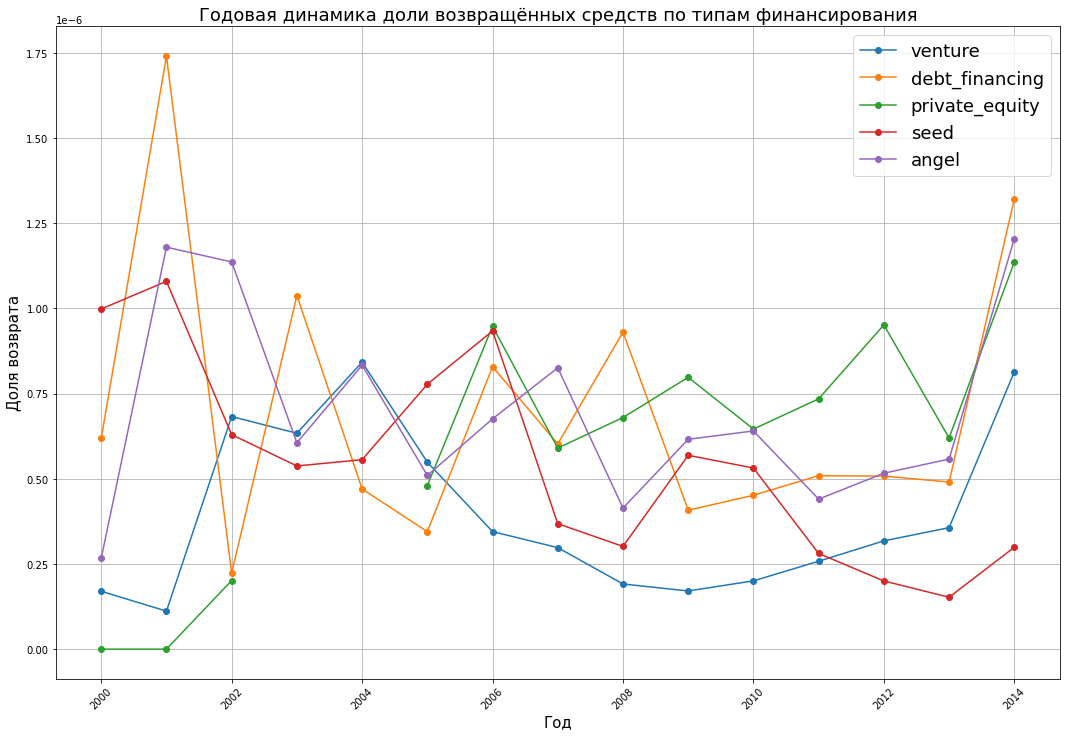

In [54]:
# Строим график для каждого типа финансирования
plt.figure(figsize=(18, 12))

for t in types:
    perc_col = t + '_pers'
    plt.plot(merged_data.index, merged_data[perc_col], marker='o', label=t)

plt.title('Годовая динамика доли возвращённых средств по типам финансирования', fontsize=18)
plt.xlabel('Год', fontsize=15)
plt.ylabel('Доля возврата', fontsize=15)
plt.legend(fontsize=18)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**По анализу годовой динамики доли возвращённых средств по типам финансирования мы можем сделать следующие выводы:**
- `Venture` (венчурное финансирование) показывает наиболее стабильный и последовательный рост, увеличение доли возврата год за годом и наименьшие скачки среди других типов финансирования.
- `Private_equity` (прямыe (частныe) вложения) демонстрирует устойчивую положительную динамику, стабильный рост с минимальными просадками.
- `Debt_financing` (долговое финансирование) и `angel` (инвестиции от бизнес-ангелов) рост присутствует, но с большой изменчивостью, периодически происходят сильные колебания.
- `Seed` (инвестиции на посевной стадии) наибольшая нестабильность показателей, резкие колебания доли возврата между годами, сложно выделить четкий тренд.


## Шаг 5. Итоговый вывод и рекомендации

**Общий обзор проделанной работы.**

Мы выгрузили данные из двух датасетов: основной датасет `cb_investments.csv`, который содержит информацию о компаниях и состоявшемся финансировании и дополнительный датасет `cb_returns.csv`, который содержит суммы возвратов по типам финансирования в миллионах долларов по годам.
- Сделали вывод о полученных данных: данные какого объёма, соответствуют ли они описанию, встречаются ли в них пропуски, используются ли верные типы данных. Далее приступили к предобработке данных:
- Проверили названия столбцов в датасетах: все ли они точно отражают содержимое данных и оформлены в удобном для работы стиле, убрали лишние пробелы в названиях столбцов.
- Изучили корректность типов данных и провели их преобразование.
- Изучили пропущенные значения в данных: посчитали их количество в каждом столбце. Были заполнены пропуски в текстовых столбцах значением unknown. При удалении записей с пропусками в ключевом столбце funding_total_usd, были также удалены соответсвующие строки из датасета с пропусками. Вычислили середину интервала между first_funding_at и last_funding_at и заполнили пропуски в mid_funding_at.
- Привели все столбцы с текстовыми значениями в нижний регистр, а код штата и страны в верхний регистр.
- Проверили данные на явные и неявные дубликаты, их обнаружено не было.
- После всех предобработок осталось 40905 уникальных записей. Относительная доля удаленных записей: 24.66% от общего объема данных.
Далее перешли к исследовательскому анализу, а именно:
- Разделили все компании на три группы: один раунд финансирования, срок финансирования до года и срок финансирования более года. Затем визуализировали соотношение этих групп, создав два графика: по количеству компаний и по объёму инвестиций.
- Выделили средние и нишевые сегменты рынка: оставили в столбце market только массовые сегменты. Для остальных сегментов заменили значения на заглушки — niche для нишевых и mid для средних. Построили график распределения количества компаний в сегментах и отобразили на нём разделение на нишевые и средние сегменты.
- Проализировали и пометили выбросы в каждом из сегментов: определили сегменты рынка с наибольшей долей компаний, получивших аномальное финансирование, и вывели топ таких сегментов.
- Проверили по основному датасету, предоставили ли нам полные данные и сделали вывод, что за 2014 год данные не полные. Далее исключили компании с аномальным финансированием. 
- Посмотрели какие типы финансирования в сумме привлекли больше всего денег и выявили, что венчурное финансирование (venture), существенного опережает остальные типы по объему финансов. Выявили наиболее популярные типы финансирования (по количеству компаний) - это venture и seed.
- Рассчитали для каждой компании средний объём одного раунда финансирования и построили два графика.
- Сделали анализ динамики размера общего финансирования по массовым сегментам рынка для растущих в 2014 году сегментов и построили линейный график.
- Проанализировали годовую динамику доли возвращённых средств по типам финансирования и визуализировали с помощью линейного графика.

**Главные выводы по исследовательскому анализу:**
- Мы узнали, что большинство компаний относятся к категории "Единичное финансирование", что говорит о большом количестве стартапов, которые привлекли инвестиции лишь один раз, а основная доля инвестиций (61.9%) приходится на компании со сроком финансирования больше года, а компании со сроком финансирования до года (7.5%) получают наименьшую долю средств.

- По объему финансирования венчурное финансирование (venture) существенно опережает остальные типы, а наиболее популярны (по количеству компаний) venture и seed финансирование. Также заметное число компаний используют debt_financing и angel. Остальные типы финансирования используются реже. Венчурное финансирование является не только самым популярным, но и приносит наибольший объем возвратов. Debt_financing (долговое финансирование) и private_equity (прямые частные инвестиции) тоже показывают значительные объемы возвратов, при этом private_equity был менее популярен по числу компаний, но показывает высокую эффективность.

- Мы наблюдаем стремительный рост инвестиционной активности с 2005 года.

- Анализ динамики по массовым сегментам рынка выявил 10 сегментов, демонстрирующих рост в 2014 году (с учетом неполноты данных за этот год): technology (технологии), manufacturing (производство — промышленные технологии), big_data (большие данные), design (дизайн — дизайн-сервисы), internet (интернет — интернет-сервисы, платформы), real estate (недвижимость), saas (Software as a Service — программное обеспечение как услуга), startups (все венчурные проекты на ранних стадиях), apps (приложения — мобильные, веб-приложения), medical (медицина).

По анализу годовой динамики доли возвращённых средств по типам финансирования мы увидели два наиболее устойчивых сегмента:
- venture (венчурное финансирование) — показывает наиболее стабильный и последовательный рост, увеличение доли возврата год за годом и наименьшие скачки среди других типов финансирования
- private_equity (прямые частные вложения) — демонстрирует устойчивую положительную динамику, стабильный рост с минимальными просадками.

**Рекомендации на основе исследовательского анализа данных:**
- Приоритетная отрасль для инвестиций: технологический сектор на big_data, saas, internet-сервисы и платформы, мобильные и веб-приложения. Эти сегменты показали наиболее стабильный рост финансирования в 2014 году (с учетом неполноты данных) и находятся на волне технологических трансформаций, что создает потенциал для высокой доходности.
- Рекомендуемые типы финансирования: venture (венчурное финансирование) - показал наиболее устойчивый рост возвратов, наименьшая изменчивость среди всех типов финансирования и самый популярный проверенный сегмент. private equity (прямые частные инвестиции) - высокий возврат при меньшем количестве сделок, стабильная положительная динамика.
- Лучше сфокусировать на компании со сроком финансирования больше года - они привлекают 61.9% всех инвестиций и демонстрируют устойчивость.